# Importing Different Packages Needed For The Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 12)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

# importing Data

In [2]:
# Load the data
data = pd.read_csv("cardio_train.csv", delimiter=';')
type(data)

pandas.core.frame.DataFrame

In [3]:
data.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2860,4026,22854,1,165,67.0,120,80,1,1,0,0,1,0
2349,3314,19679,1,164,68.0,110,80,2,1,0,0,1,0
3320,4683,15908,2,182,90.0,130,80,2,1,1,1,1,1
659,938,18235,1,162,62.0,110,70,1,1,0,0,1,0
4064,5755,15969,1,149,56.0,90,70,1,1,0,0,1,0


In [4]:
data.shape

(6053, 13)

## cleaning and understanding our dataset

In [5]:
print(data['cholesterol'].unique())
data['cardio'].nunique()

[1 3 2]


2

In [6]:
data.nunique()

id             6053
age            3875
gender            2
height           63
weight          127
ap_hi            73
ap_lo            66
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

### unique values are mainly high in age,height,weight,ap_hi,ap_lo

In [7]:
data.drop("id",axis=1,inplace=True)


In [8]:
data.duplicated().sum()

0

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
info = ["age in days","Gender | 1: female, 2: male","Height-(cm)","Weight-(kg)","Systolic blood pressure-(norm:120 hg)","Diastolic blood pressure-(norm:80 hg)","Cholesterol | type-1: normal, 2: above normal, 3: well above normal|","Glucose | type-- 1: normal, 2: above normal, 3: well above normal |","Smoking |type- 0: do 1: dont do","Alcohol intake|type- 0: do 1: dont do ","Physical activity |type- 0: do 1: dont do","Presence or absence of cardiovascular disease"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age in days
gender:			Gender | 1: female, 2: male
height:			Height-(cm)
weight:			Weight-(kg)
ap_hi:			Systolic blood pressure-(norm:120 hg)
ap_lo:			Diastolic blood pressure-(norm:80 hg)
cholesterol:			Cholesterol | type-1: normal, 2: above normal, 3: well above normal|
gluc:			Glucose | type-- 1: normal, 2: above normal, 3: well above normal |
smoke:			Smoking |type- 0: do 1: dont do
alco:			Alcohol intake|type- 0: do 1: dont do 
active:			Physical activity |type- 0: do 1: dont do
cardio:			Presence or absence of cardiovascular disease


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6053 entries, 0 to 6052
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6053 non-null   int64  
 1   gender       6053 non-null   int64  
 2   height       6053 non-null   int64  
 3   weight       6053 non-null   float64
 4   ap_hi        6053 non-null   int64  
 5   ap_lo        6053 non-null   int64  
 6   cholesterol  6053 non-null   int64  
 7   gluc         6053 non-null   int64  
 8   smoke        6053 non-null   int64  
 9   alco         6053 non-null   int64  
 10  active       6053 non-null   int64  
 11  cardio       6053 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 614.8 KB


In [12]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# thankfuly no nan values

In [13]:
# Convert age from days to years
data['age'] = (data['age'] / 365).round().astype(int)
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
data['age'].nunique()

27

In [15]:
data['cholesterol'].value_counts()

1    4508
2     846
3     699
Name: cholesterol, dtype: int64

In [16]:
data['gluc'].value_counts()

1    5142
2     459
3     452
Name: gluc, dtype: int64

In [17]:
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [18]:
data.drop(["weight","height"],axis=1,inplace=True)

### check for outliers

<Figure size 9360x5760 with 0 Axes>

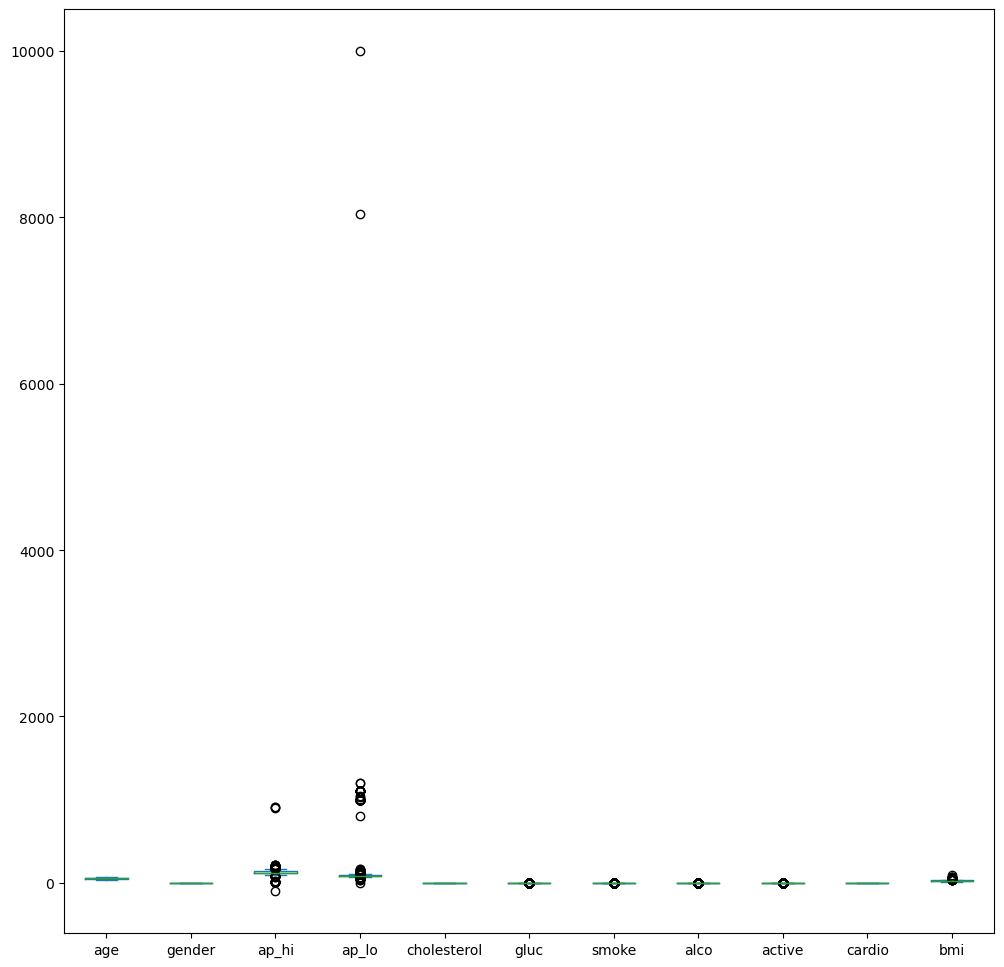

In [19]:
import matplotlib.pyplot as plt
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

### In addition, in some cases diastolic pressure is higher than systolic, which is also incorrect. How many records are inaccurate in terms of blood pressure?

In [20]:
print("Diastolic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

Diastolic pressure is higher than systolic one in 122 cases


In [21]:
data[data['ap_lo']> data['ap_hi']].shape[0]

122

### Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [22]:
print('Maximum systolic pressure:',data["ap_hi"].max())
print('Minimum systolic pressure:', data["ap_hi"].min())
print('Number of systolic pressure variables:', data["ap_hi"].nunique())

Maximum systolic pressure: 909
Minimum systolic pressure: -100
Number of systolic pressure variables: 73


In [23]:
print('Maximum diastolic pressure:',data["ap_lo"].max())
print('Minimum diastolic pressure:', data["ap_lo"].min())
print('Number of diastolic pressure variables:', data["ap_lo"].nunique())

Maximum diastolic pressure: 10000
Minimum diastolic pressure: 0
Number of diastolic pressure variables: 66


In [24]:
# data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
# data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

In [25]:
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

5966

In [26]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]
len(data)

5965

In [27]:
data[data['ap_lo']> data['ap_hi']].shape[0]

37

In [28]:
#Collapse ap_hi into fewer groups
ranges = [0, 130, 180, 320]
group_names = ['Normal', 'Hypertension', 'Hypertensive crisis']
data['systolic'] = pd.cut(data['ap_hi'], bins=ranges, labels=group_names)
data['systolic'].unique()

['Normal', 'Hypertension', 'Hypertensive crisis']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']

In [29]:
#Collapse ap_lo into fewer groups
ranges = [-1, 81, 120, 201]
group_names = ['Normal', 'Hypertension', 'Hypertensive crisis']
data['diastolic'] = pd.cut(data['ap_lo'], bins=ranges, labels=group_names)
data['diastolic'].unique()

['Normal', 'Hypertension', 'Hypertensive crisis']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']

<Figure size 9360x5760 with 0 Axes>

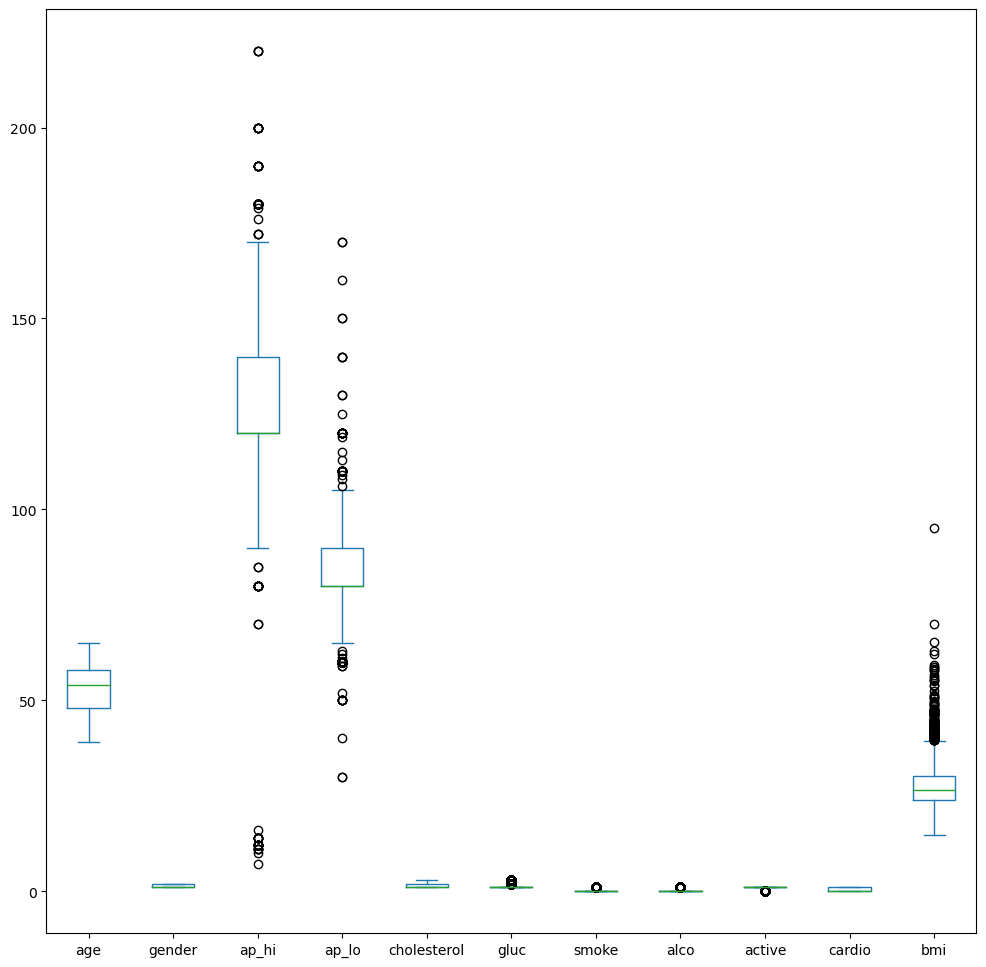

In [30]:
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

### Let's remove bmi

In [31]:
print('Maximum body mass index:',data["bmi"].max())
print('Minimum body mass index:', data["bmi"].min())
print('Number of body mass index:', data["bmi"].nunique())

Maximum body mass index: 95.22160664819944
Minimum body mass index: 14.701136648857974
Number of body mass index: 1716


In [32]:
out_filter2 = ((data["bmi"]>150))
data = data[~out_filter2]
len(data)

5965

In [33]:
#Collapse bmi into fewer groups
ranges = [0, 19, 25, 30, 160]
group_names = ['Underweight', 'Normal', 'Overweight', 'Obesity']
data['bmi_group'] = pd.cut(data['bmi'], bins=ranges, labels=group_names)
data['bmi_group'].unique()

['Normal', 'Obesity', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']

<Figure size 9360x5760 with 0 Axes>

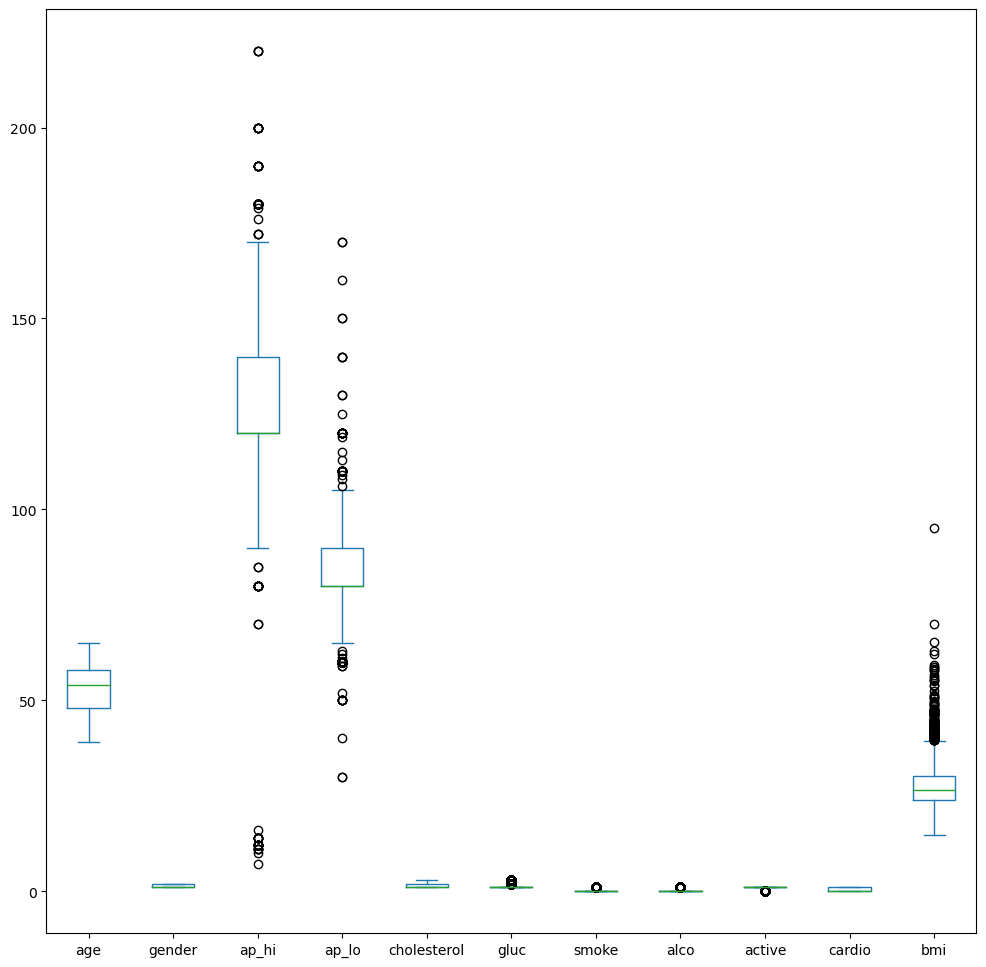

In [34]:
plt.figure(num=None, figsize=(10.4, 6.4), dpi=900, facecolor='w', edgecolor='k')
data.plot(kind='box')
plt.show();

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 0 to 6052
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          5965 non-null   int32   
 1   gender       5965 non-null   int64   
 2   ap_hi        5965 non-null   int64   
 3   ap_lo        5965 non-null   int64   
 4   cholesterol  5965 non-null   int64   
 5   gluc         5965 non-null   int64   
 6   smoke        5965 non-null   int64   
 7   alco         5965 non-null   int64   
 8   active       5965 non-null   int64   
 9   cardio       5965 non-null   int64   
 10  bmi          5965 non-null   float64 
 11  systolic     5965 non-null   category
 12  diastolic    5965 non-null   category
 13  bmi_group    5965 non-null   category
dtypes: category(3), float64(1), int32(1), int64(9)
memory usage: 553.9 KB


In [36]:
data.describe()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000,5965.000000
mean,53.273596,1.353562,125.985583,81.503101,1.368483,1.225147,0.088181,0.054820,0.795641,0.497066,27.545804
std,6.815346,0.478115,18.094352,9.751087,0.680040,0.568664,0.283582,0.227647,0.403266,0.500033,5.434329
min,39.000000,1.000000,7.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.701137
25%,48.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.446281
75%,58.000000,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,65.000000,2.000000,220.000000,170.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,95.221607


### Analysing the 'target' variable

In [37]:
data["cardio"].describe()

count    5965.000000
mean        0.497066
std         0.500033
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: cardio, dtype: float64

In [38]:
data["cardio"].unique()

array([0, 1], dtype=int64)

##### Clearly, this is a classification problem, with the target variable having values '0' and '1'

In [39]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))


cardio         1.000000
ap_hi          0.389407
ap_lo          0.326114
age            0.229857
cholesterol    0.229016
bmi            0.192825
gluc           0.086941
active         0.042471
smoke          0.014730
alco           0.006688
gender         0.001183
Name: cardio, dtype: float64


In [40]:
#check for correlation among the numerical columns
correlation = data.select_dtypes('number').corr()
correlation

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
age,1.000000,-0.014460,0.188895,0.130809,0.170999,0.097453,-0.046927,-0.030202,-0.017478,0.229857,0.105899
gender,-0.014460,1.000000,0.039023,0.067684,-0.018632,-0.022716,0.325275,0.179293,0.022604,0.001183,-0.116395
ap_hi,0.188895,0.039023,1.000000,0.614968,0.188260,0.093704,0.006881,0.012282,0.002423,0.389407,0.235607
ap_lo,0.130809,0.067684,0.614968,1.000000,0.151188,0.065748,0.014636,0.044451,-0.007365,0.326114,0.211749
cholesterol,0.170999,-0.018632,0.188260,0.151188,1.000000,0.441443,0.029716,0.021127,0.028847,0.229016,0.179275
gluc,0.097453,-0.022716,0.093704,0.065748,0.441443,1.000000,0.004755,0.009555,0.019342,0.086941,0.111254
smoke,-0.046927,0.325275,0.006881,0.014636,0.029716,0.004755,1.000000,0.332882,0.034445,-0.014730,-0.044263
alco,-0.030202,0.179293,0.012282,0.044451,0.021127,0.009555,0.332882,1.000000,0.036210,-0.006688,0.020461
active,-0.017478,0.022604,0.002423,-0.007365,0.028847,0.019342,0.034445,0.036210,1.000000,-0.042471,-0.013943
cardio,0.229857,0.001183,0.389407,0.326114,0.229016,0.086941,-0.014730,-0.006688,-0.042471,1.000000,0.192825


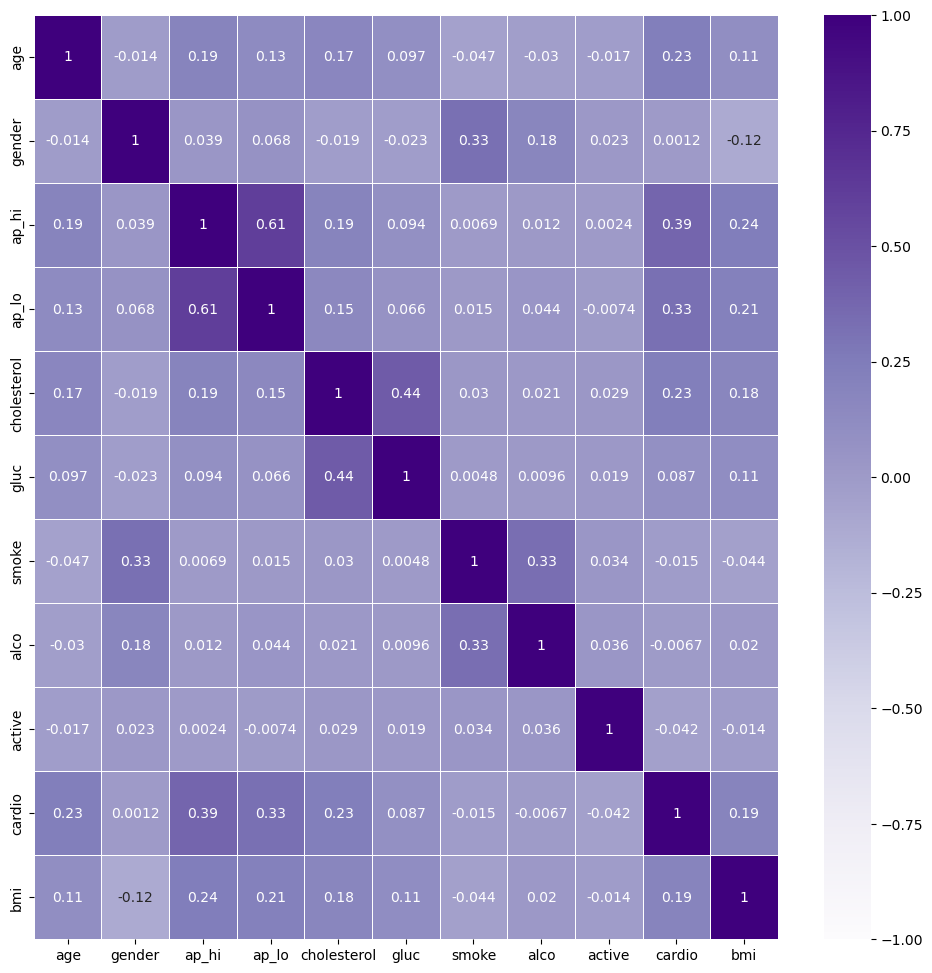

In [41]:
import seaborn as sns
#visualise the correlation
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, cmap='Purples', linewidth=0.5);

# analysing

## EDA

0    3000
1    2965
Name: cardio, dtype: int64


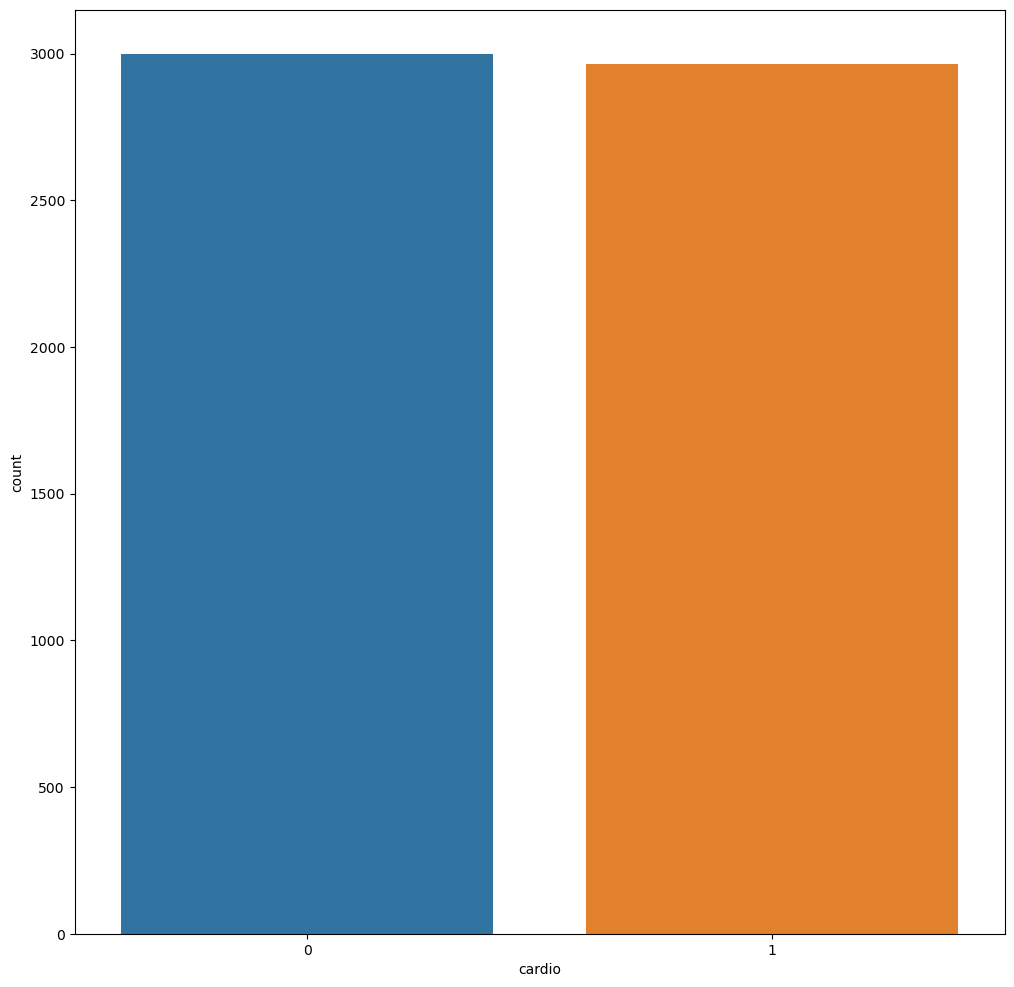

In [42]:
y = data["cardio"]
sns.countplot(y)

target_temp = data.cardio.value_counts()
print(target_temp)

<AxesSubplot:xlabel='gender', ylabel='cardio'>

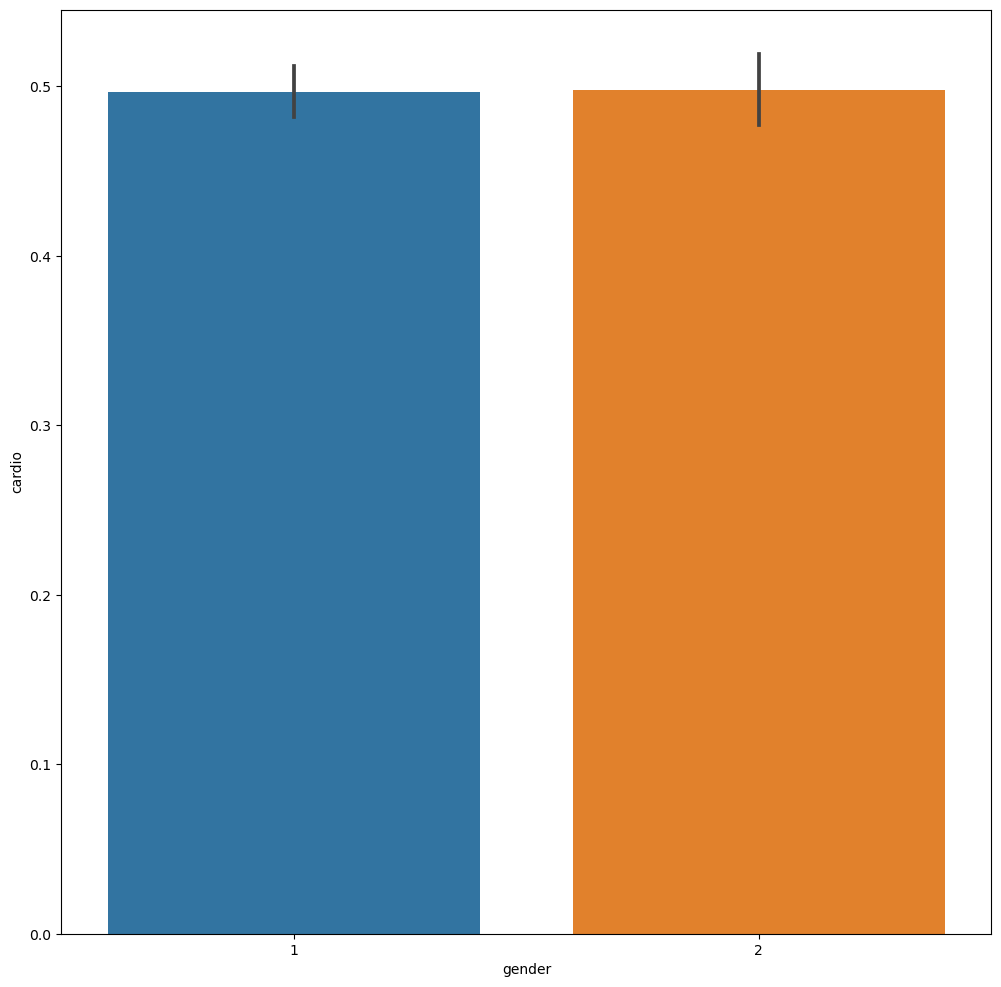

In [43]:
sns.barplot(data["gender"],y)

<AxesSubplot:xlabel='cardio', ylabel='count'>

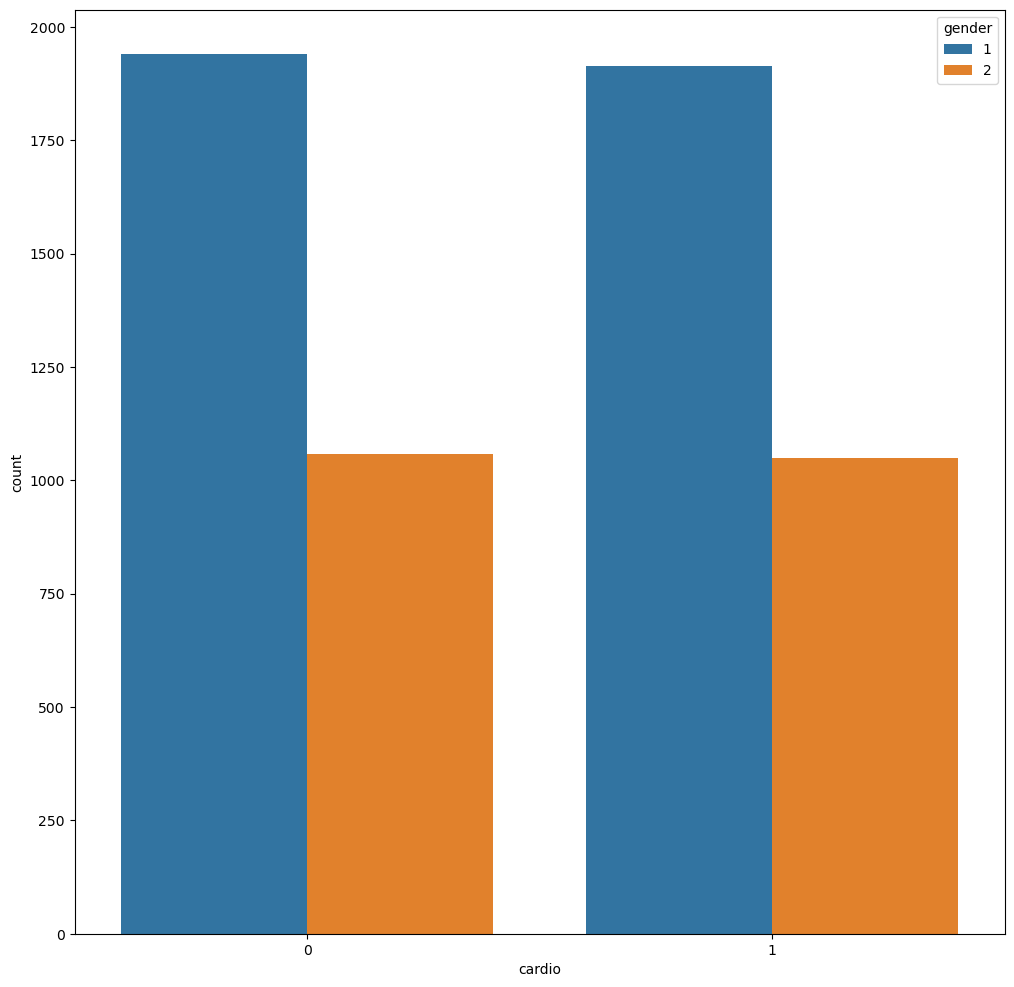

In [44]:
sns.countplot(x='cardio',hue='gender',data=data)

<AxesSubplot:xlabel='cholesterol', ylabel='cardio'>

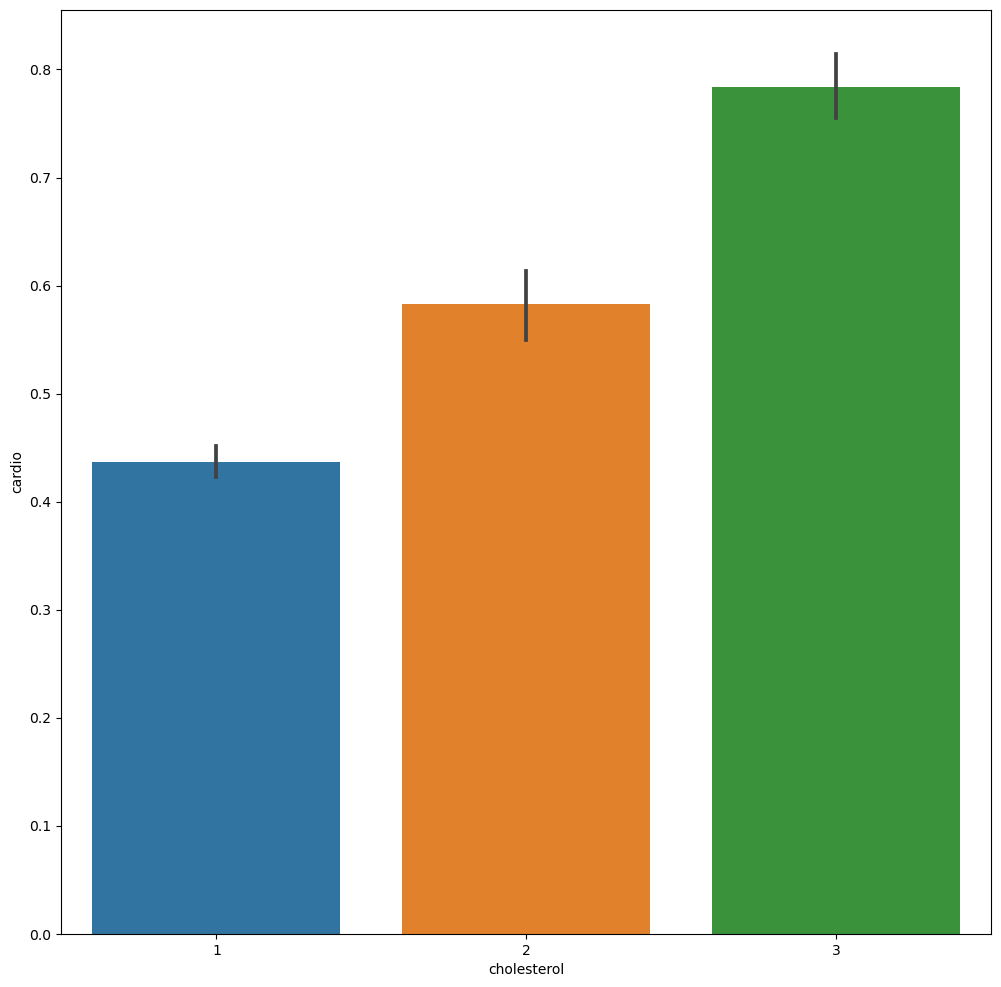

In [45]:
sns.barplot(data=data,x="cholesterol", y="cardio")
# plt.show()

In [46]:
value_counts = data.groupby(["cholesterol", "cardio"]).size()

print(value_counts)

cholesterol  cardio
1            0         2507
             1         1945
2            0          345
             1          483
3            0          148
             1          537
dtype: int64


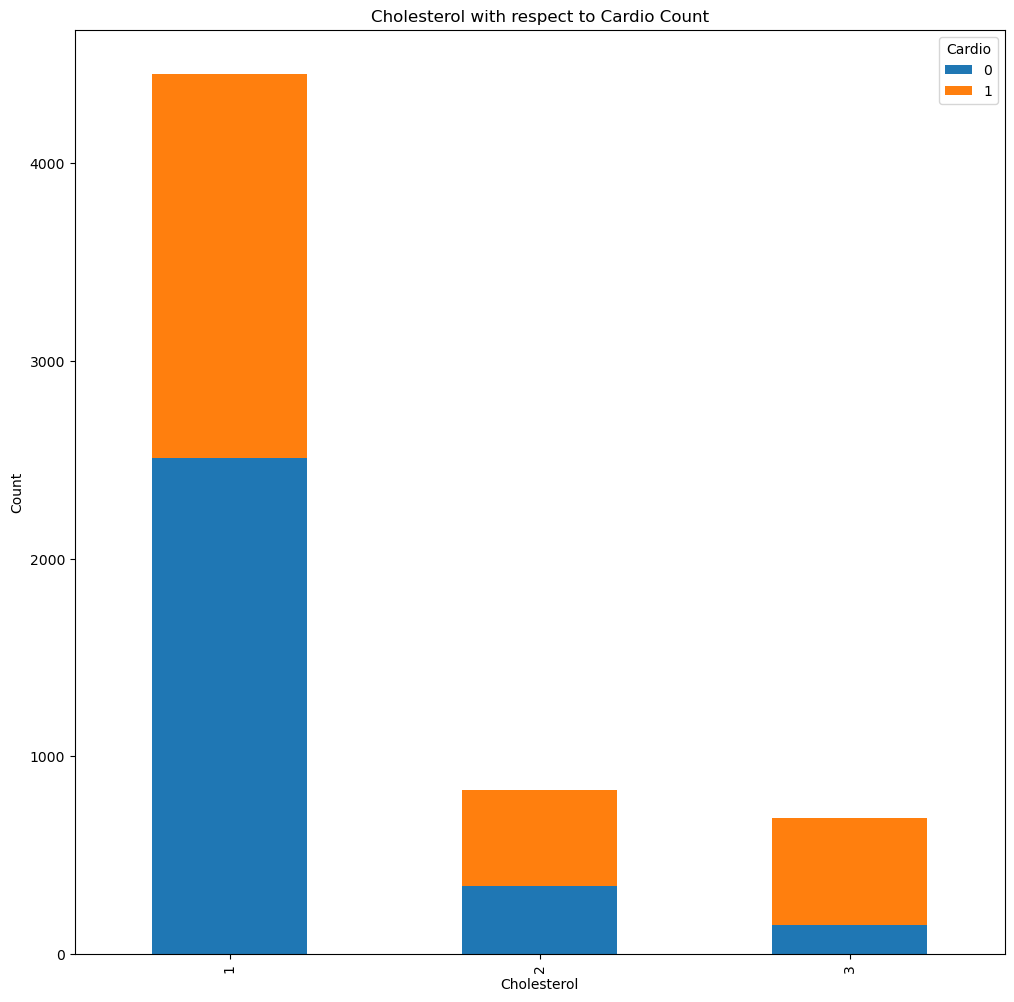

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the value count of "cardio" for each unique "cholesterol" value
value_counts = data.groupby("cholesterol")["cardio"].value_counts().unstack()

# Plot the value counts
ax = value_counts.plot(kind="bar", stacked=True)

# Customize the plot
ax.set_xlabel("Cholesterol")
ax.set_ylabel("Count")
ax.set_title("Cholesterol with respect to Cardio Count")
plt.legend(title="Cardio", loc="upper right")

# Display the plot
plt.show()

<AxesSubplot:xlabel='gluc', ylabel='cardio'>

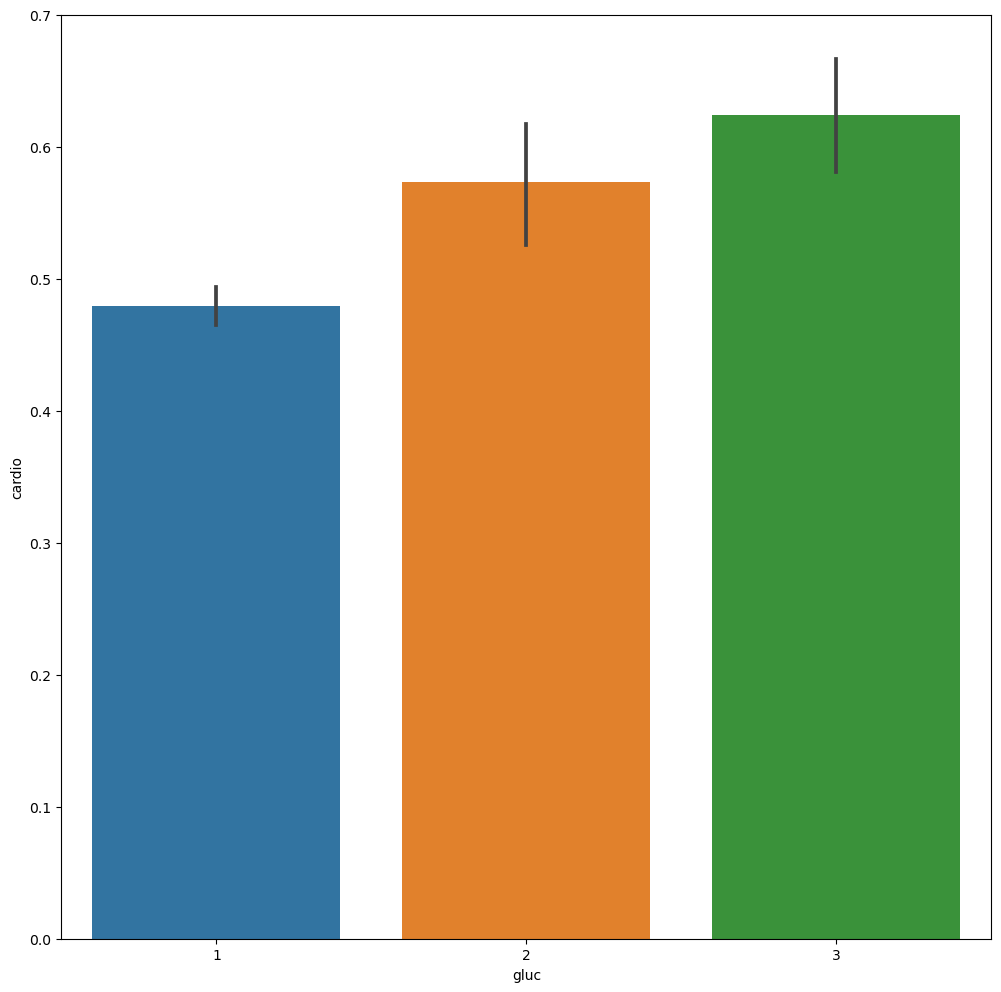

In [48]:
sns.barplot(data=data,x="gluc", y="cardio")
# plt.show()

<AxesSubplot:xlabel='smoke', ylabel='cardio'>

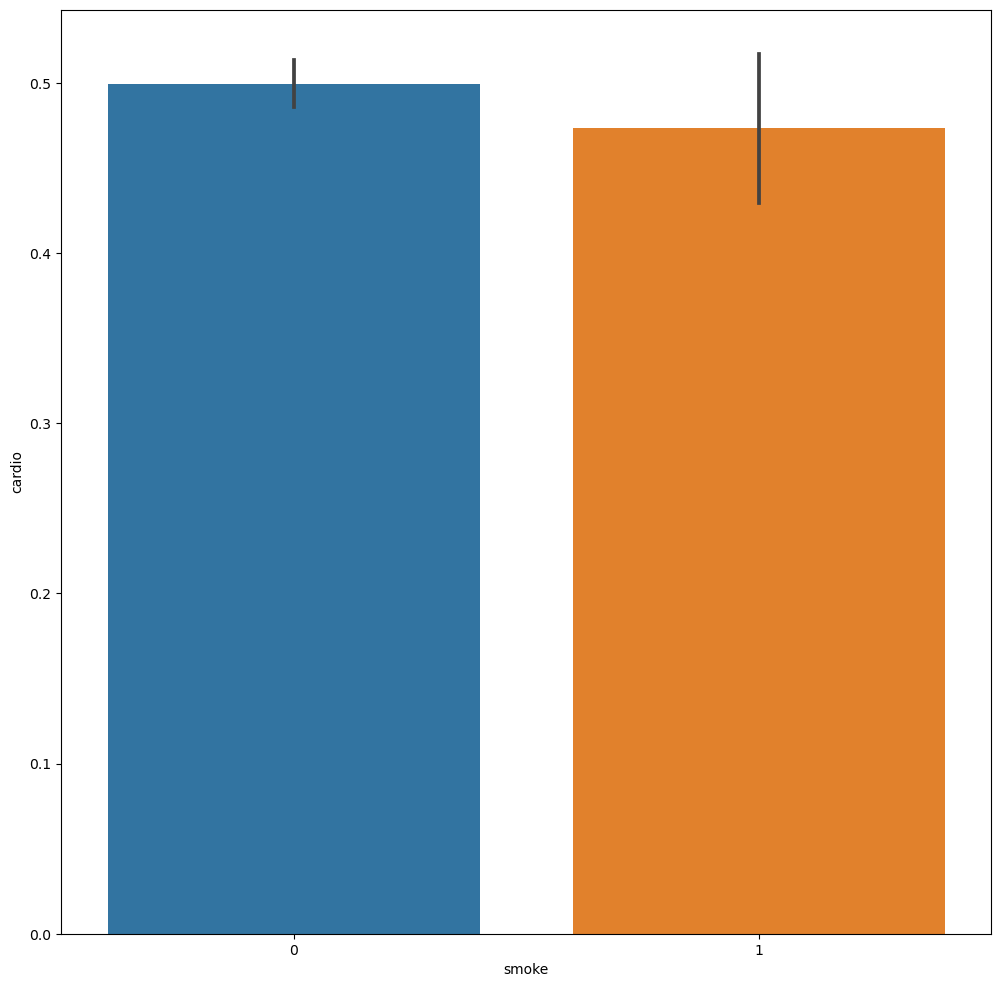

In [49]:
sns.barplot(data=data,x="smoke", y="cardio")
# plt.show()

<AxesSubplot:xlabel='alco', ylabel='cardio'>

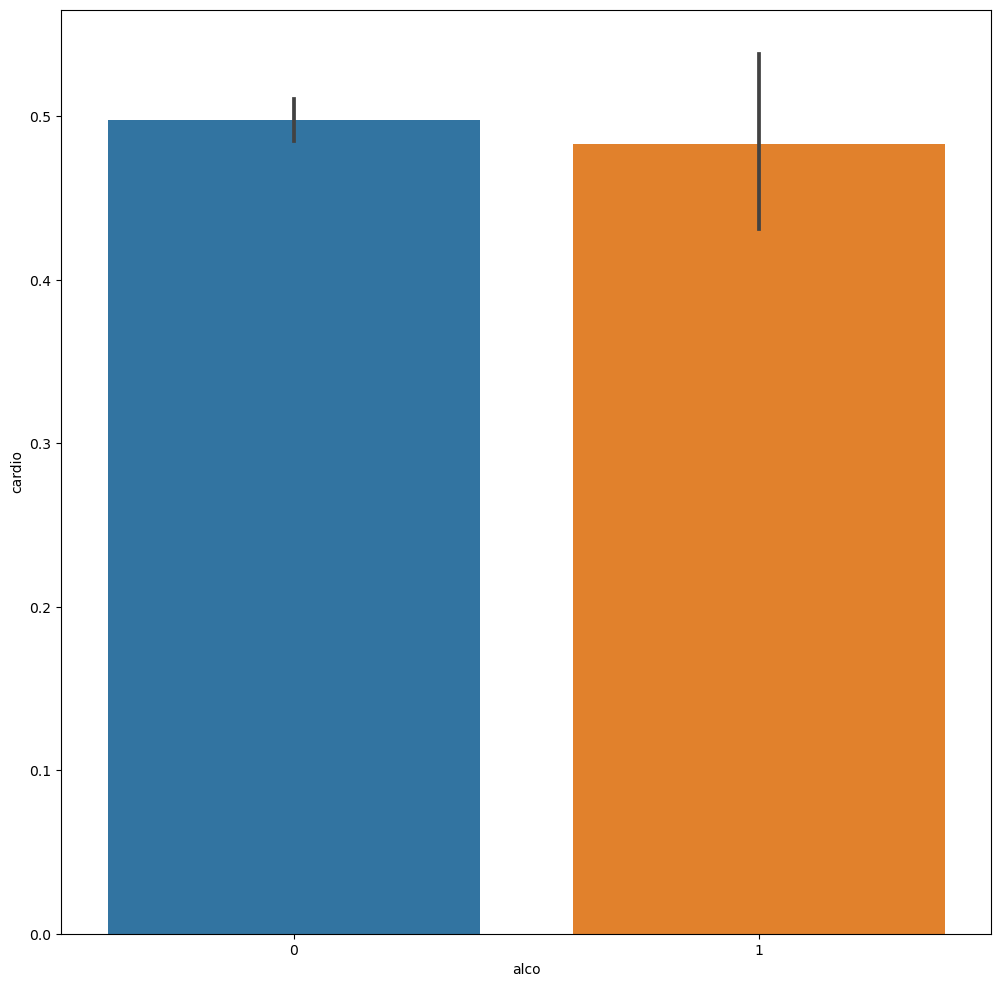

In [50]:
sns.barplot(data=data,x="alco", y="cardio")
# plt.show()

In [51]:
data.groupby('gender')['alco'].sum()

gender
1     95
2    232
Name: alco, dtype: int64

<AxesSubplot:xlabel='active', ylabel='cardio'>

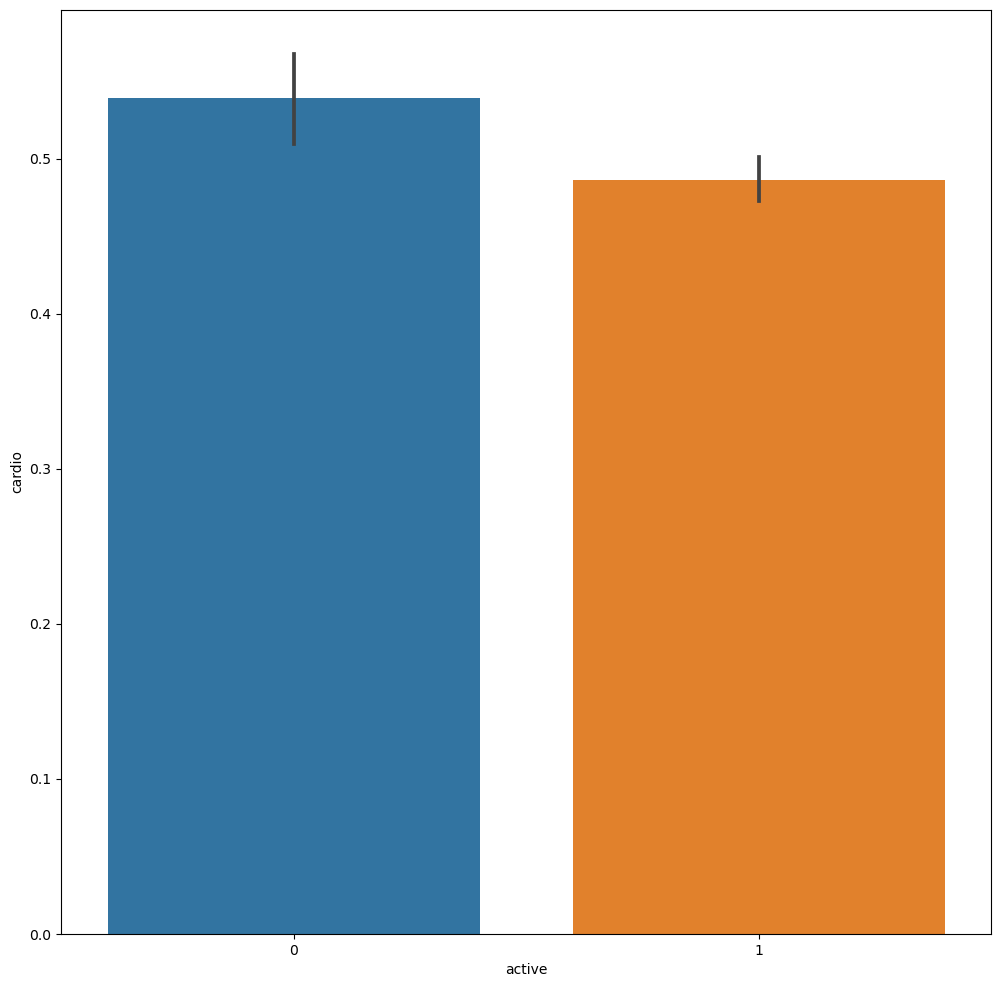

In [52]:
sns.barplot(data=data,x="active", y="cardio")
# plt.show()

<AxesSubplot:ylabel='Frequency'>

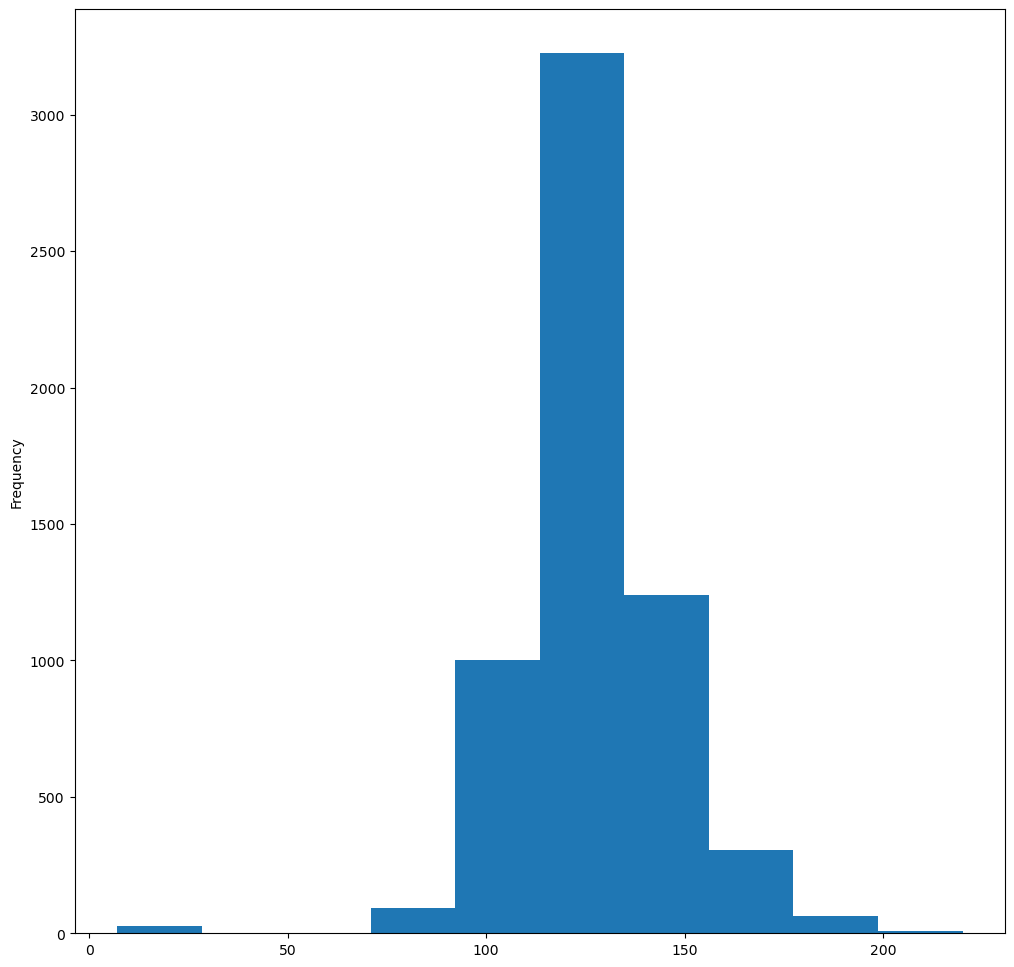

In [53]:
data['ap_hi'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

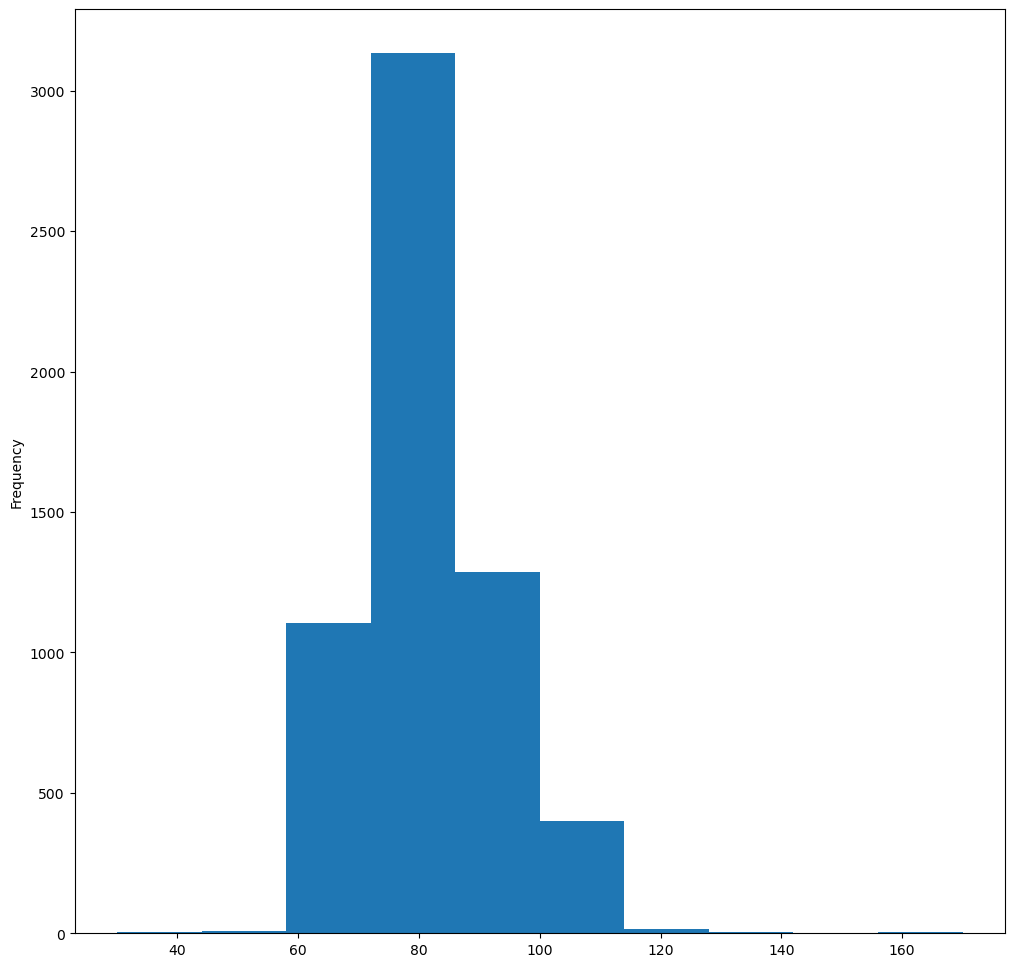

In [54]:
data['ap_lo'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

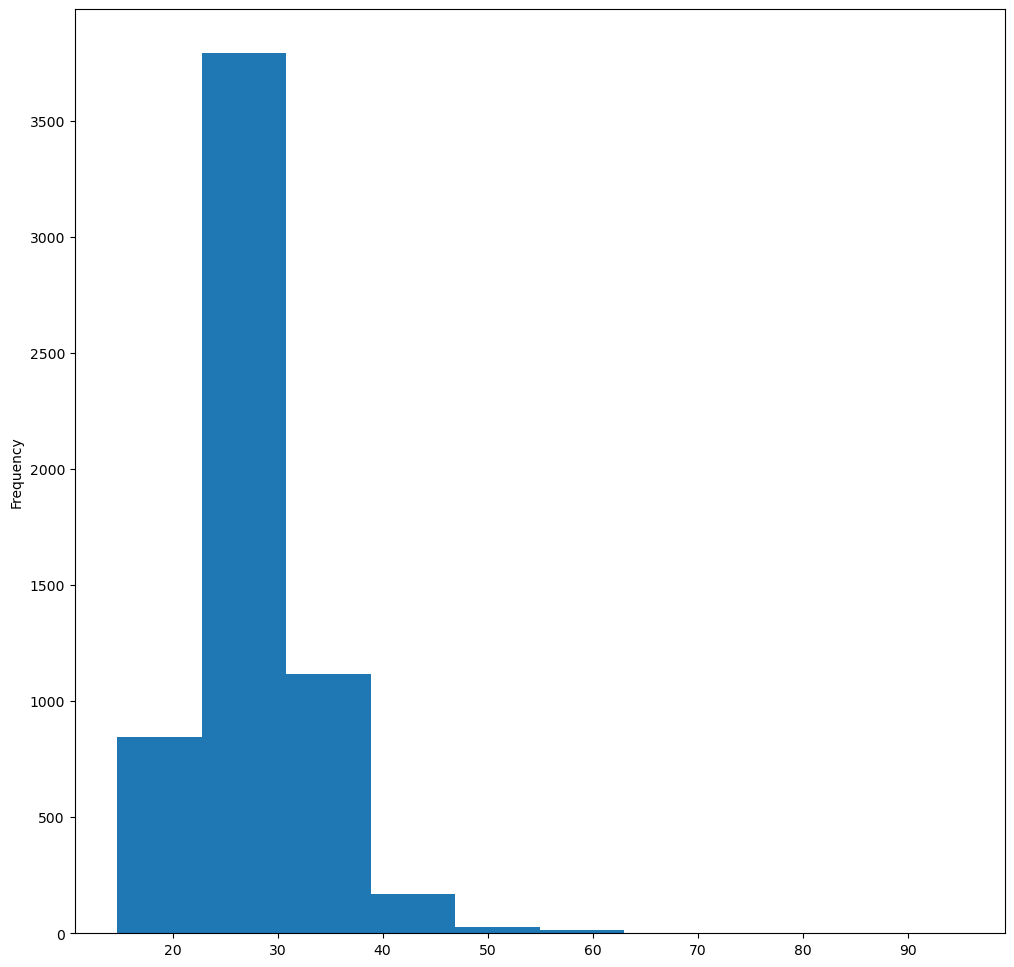

In [55]:
data['bmi'].plot.hist()

Diastilic pressure is higher than systolic one in 37 cases


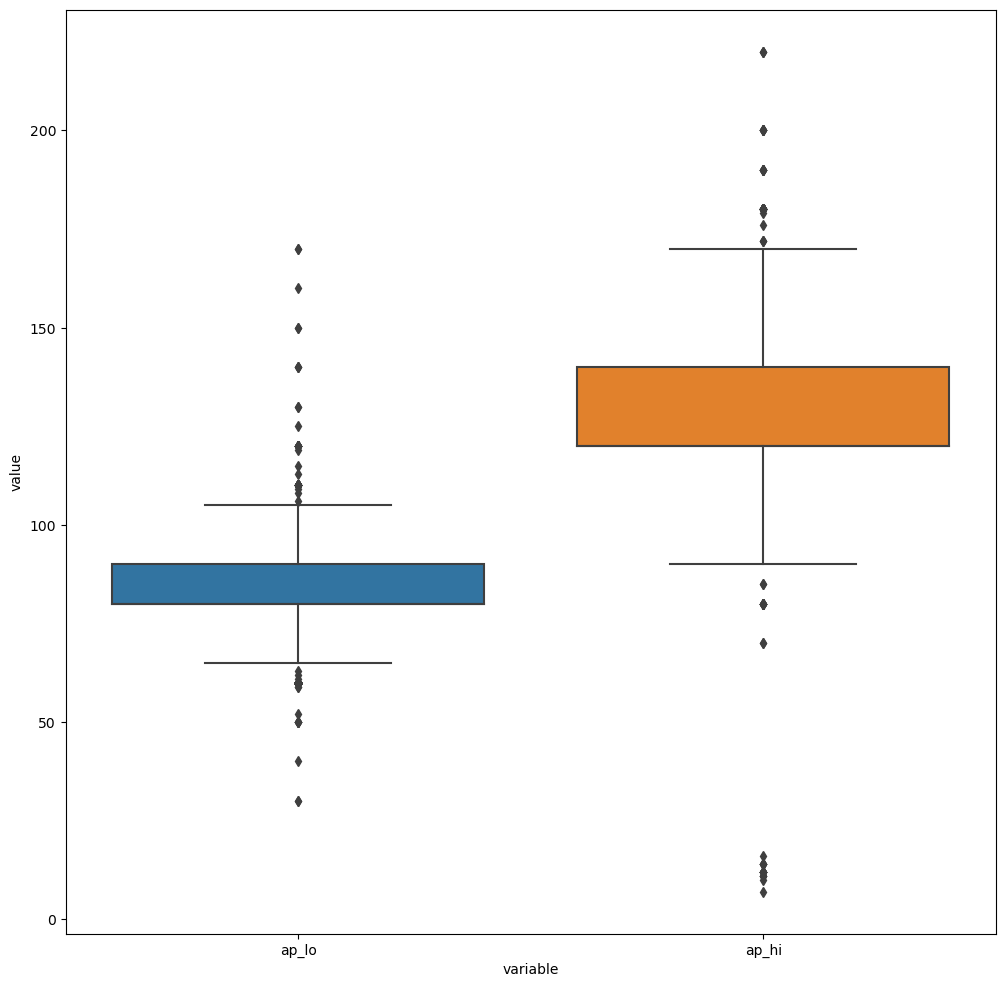

In [56]:
blood_pressure = data.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['ap_lo']> data['ap_hi']].shape[0]))

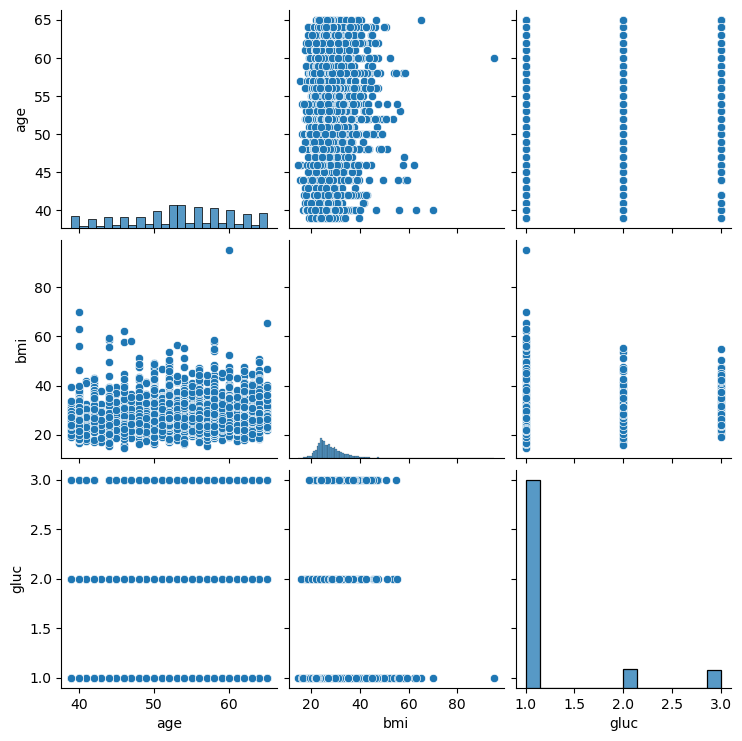

In [57]:
#Visualize the relationships among age, bmi and avg_glucose_level
columns= ['age', 'bmi', 'gluc']
sns.pairplot(data[columns])
plt.show()

In [58]:
print(data.corr()["cardio"].abs().sort_values(ascending=False))

cardio         1.000000
ap_hi          0.389407
ap_lo          0.326114
age            0.229857
cholesterol    0.229016
bmi            0.192825
gluc           0.086941
active         0.042471
smoke          0.014730
alco           0.006688
gender         0.001183
Name: cardio, dtype: float64


In [59]:
columns = ['bmi_group', 'systolic','diastolic', 'cholesterol','gluc','gender']

for column in columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}:{unique_values}")

Unique values for bmi_group:['Normal', 'Obesity', 'Overweight', 'Underweight']
Categories (4, object): ['Underweight' < 'Normal' < 'Overweight' < 'Obesity']
Unique values for systolic:['Normal', 'Hypertension', 'Hypertensive crisis']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']
Unique values for diastolic:['Normal', 'Hypertension', 'Hypertensive crisis']
Categories (3, object): ['Normal' < 'Hypertension' < 'Hypertensive crisis']
Unique values for cholesterol:[1 3 2]
Unique values for gluc:[1 2 3]
Unique values for gender:[2 1]


## Binary Encoding:

In [60]:
labelencoder = LabelEncoder()
data['gender']=labelencoder.fit_transform(data['gender'])

In [61]:
data.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,systolic,diastolic,bmi_group
0,50,1,110,80,1,1,0,0,1,0,21.967120,Normal,Normal,Normal
1,55,0,140,90,3,1,0,0,1,1,34.927679,Hypertension,Hypertension,Obesity
2,52,0,130,70,3,1,0,0,0,1,23.507805,Normal,Normal,Normal
3,48,1,150,100,1,1,0,0,1,1,28.710479,Hypertension,Hypertension,Overweight
4,48,0,100,60,1,1,0,0,0,0,23.011177,Normal,Normal,Normal


## Label Encoding:

In [62]:
#Encode for categorical columns
cat_cols = ['systolic', 'diastolic', 'bmi_group']

for col in cat_cols:
    data[col] = labelencoder.fit_transform(data[col])

In [63]:
data.sample(5)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,systolic,diastolic,bmi_group
5620,48,0,120,80,1,1,0,0,0,1,23.183391,2,2,0
5039,58,0,160,100,3,3,0,0,1,0,26.986001,0,0,2
4930,50,0,120,80,2,1,0,0,1,1,31.633715,2,2,1
3456,51,0,120,80,3,3,0,0,1,0,28.256990,2,2,2
202,40,0,150,100,2,1,0,0,1,1,28.326580,0,0,2


## One-Hot-Encoding:

In [64]:
data = pd.get_dummies(data, columns=['cholesterol', 'gluc'], drop_first=True)

In [65]:
data.sample(5)

,age,gender,ap_hi,ap_lo,smoke,alco,active,cardio,bmi,systolic,diastolic,bmi_group,cholesterol_2,cholesterol_3,gluc_2,gluc_3
3970,64,0,150,80,0,0,1,0,25.910684,0,2,2,1,0,0,1
5706,58,1,160,90,0,0,1,1,27.141582,0,0,2,0,0,0,0
2331,52,0,120,80,0,0,1,0,29.937595,2,2,2,0,0,0,0
5016,46,0,90,60,0,0,1,0,21.750197,2,2,0,0,0,0,0
1089,56,0,120,80,0,0,1,0,28.906250,2,2,2,1,0,0,0


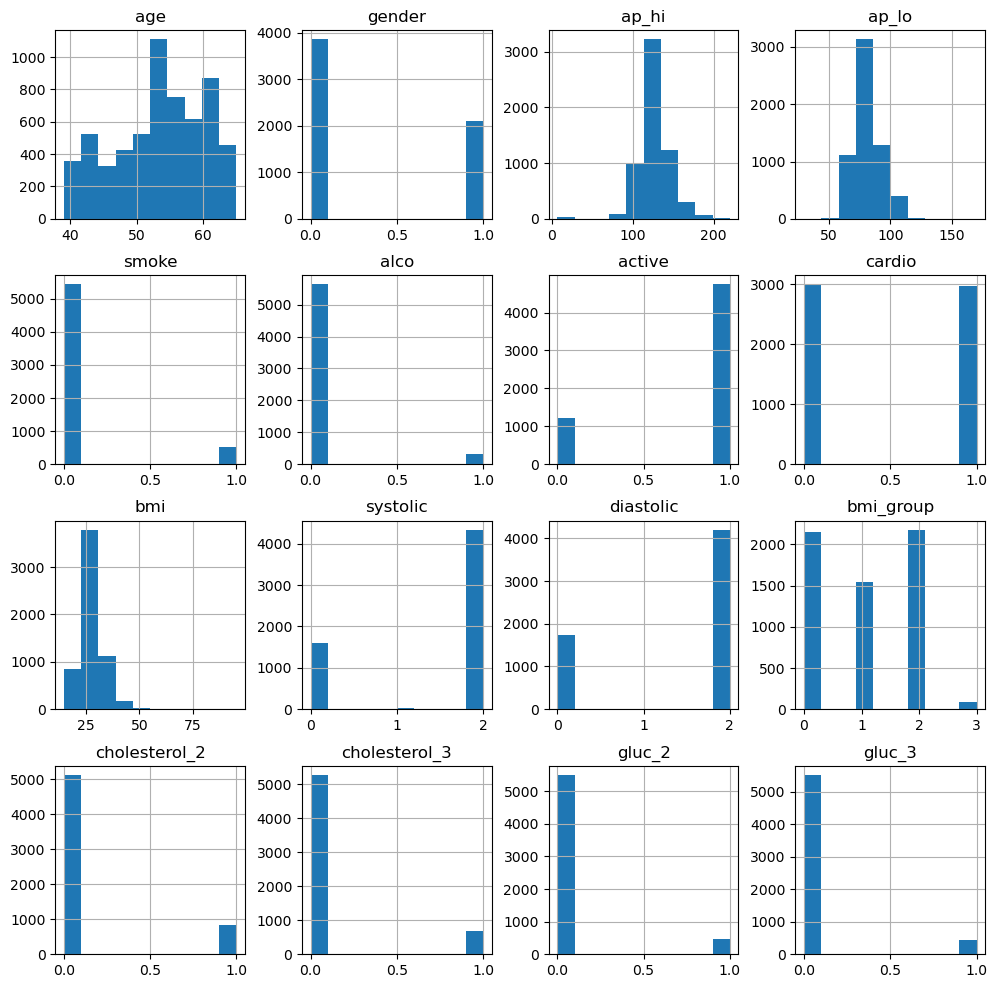

In [66]:
data.hist();

# Train Test split

In [67]:
# Split into features and labels
x = data.drop(['cardio'], axis=1)
y = data['cardio']

In [68]:
# Normalize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split,GridSearchCV
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:

x_test.shape
x_train.shape

(4473, 15)

In [71]:
y_train.shape
y_test.shape

(1492,)

# logistic regression

In [72]:
log_reg = LogisticRegression(class_weight='balanced')
param_grid={
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)


{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [73]:
#instantiate, fit, and predict with the logistic regression
log_reg = LogisticRegression(C=.01, penalty='l1', solver='saga', class_weight='balanced')
log_reg.fit(x_train, y_train)
y_pred_lr = log_reg.predict(x_test)
y_pred_lr

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [74]:
#check for the accuracy score of the log_reg
score_log_reg = round(accuracy_score(y_test, y_pred_lr)*100,2)
score_log_reg

71.92

In [75]:
print("The accuracy score achieved using Logistic regression is: "+str(score_log_reg)+" %")

The accuracy score achieved using Logistic regression is: 71.92 %


In [76]:
#evaluate and print the train set accuracy
log_reg_train_accuracy = log_reg.score(x_train, y_train)
log_reg_train_accuracy

0.7234518220433713

In [77]:
#evaluate and print the test set accuracy
log_reg_test_accuracy = log_reg.score(x_test, y_test)
log_reg_test_accuracy

0.7191689008042895

# SVM

In [78]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
# from sklearn.svm import SVC
# sv = SVC()
sv.fit(x_train, y_train)

y_pred_svm = sv.predict(x_test)

In [79]:
y_pred_svm.shape

(1492,)

In [80]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 71.05 %


In [81]:
#evaluate and print the train set accuracy
svm_train_accuracy = sv.score(x_train, y_train)
svm_train_accuracy

0.7158506595126314

In [82]:
#evaluate and print the test set accuracy
svm_test_accuracy = sv.score(x_test, y_test)
svm_test_accuracy

0.710455764075067

# K Nearest Neighbors

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [84]:
y_pred_knn.shape

(1492,)

In [85]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.36 %


In [86]:
#evaluate and print the train set accuracy
knn_train_accuracy = knn.score(x_train, y_train)
knn_train_accuracy

0.7641403979432149

In [87]:
#evaluate and print the test set accuracy
knn_test_accuracy = knn.score(x_test, y_test)
knn_test_accuracy

0.6836461126005362

# Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

In [89]:
y_pred_nb.shape

(1492,)

In [90]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 71.05 %


In [91]:
#evaluate and print the train set accuracy
nb_train_accuracy = nb.score(x_train, y_train)
nb_train_accuracy

0.7212161860049184

In [92]:
#evaluate and print the test set accuracy
nb_test_accuracy = nb.score(x_test, y_test)
nb_test_accuracy

0.710455764075067

# Decision Tree

### Let's perform hyperparameter tuning for our Decision Tree model:

In [93]:
dt = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3,4],
    'random_state':[0, 42]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [94]:
#instantiate, fit, and predict with DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4, random_state=0)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [95]:
#check for the accuracy score of the dt
score_dt = round(accuracy_score(y_test, y_pred_dt)*100,2)
score_dt

70.91

In [96]:
print("The accuracy score achieved using Decision tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision tree is: 70.91 %


In [97]:
#evaluate and print the train set accuracy
dt_train_accuracy = dt.score(x_train, y_train)
dt_train_accuracy

0.755868544600939

In [98]:
#evaluate and print the test set accuracy
dt_test_accuracy = dt.score(x_test, y_test)
dt_test_accuracy

0.7091152815013405

# Random Forest

In [99]:
rfc = RandomForestClassifier(class_weight='balanced')
param_grid={
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

#perform grid search with cross-validation to obtain the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 0}


In [100]:
#instantiate, fit, and predict with Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=200, random_state=42, class_weight='balanced')
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

In [101]:
#check for the accuracy score of the dt
score_rfc = round(accuracy_score(y_test, y_pred_rfc)*100,2)
score_rfc

72.65

In [102]:
print("The accuracy score achieved using RandomForest is: "+str(score_rfc)+" %")

The accuracy score achieved using RandomForest is: 72.65 %


In [103]:
#evaluate and print the train set accuracy
rfc_train_accuracy = rfc.score(x_train, y_train)
rfc_train_accuracy

0.7981220657276995

In [104]:
#evaluate and print the test set accuracy
rfc_test_accuracy = rfc.score(x_test, y_test)
rfc_test_accuracy

0.7265415549597856

## Now, let's compare the accuracy of the three models we've deployed:

In [105]:
scores = [score_log_reg,score_nb,score_svm,score_knn,score_dt,score_rfc]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 71.92 %
The accuracy score achieved using Naive Bayes is: 71.05 %
The accuracy score achieved using Support Vector Machine is: 71.05 %
The accuracy score achieved using K-Nearest Neighbors is: 68.36 %
The accuracy score achieved using Decision Tree is: 70.91 %
The accuracy score achieved using Random Forest is: 72.65 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

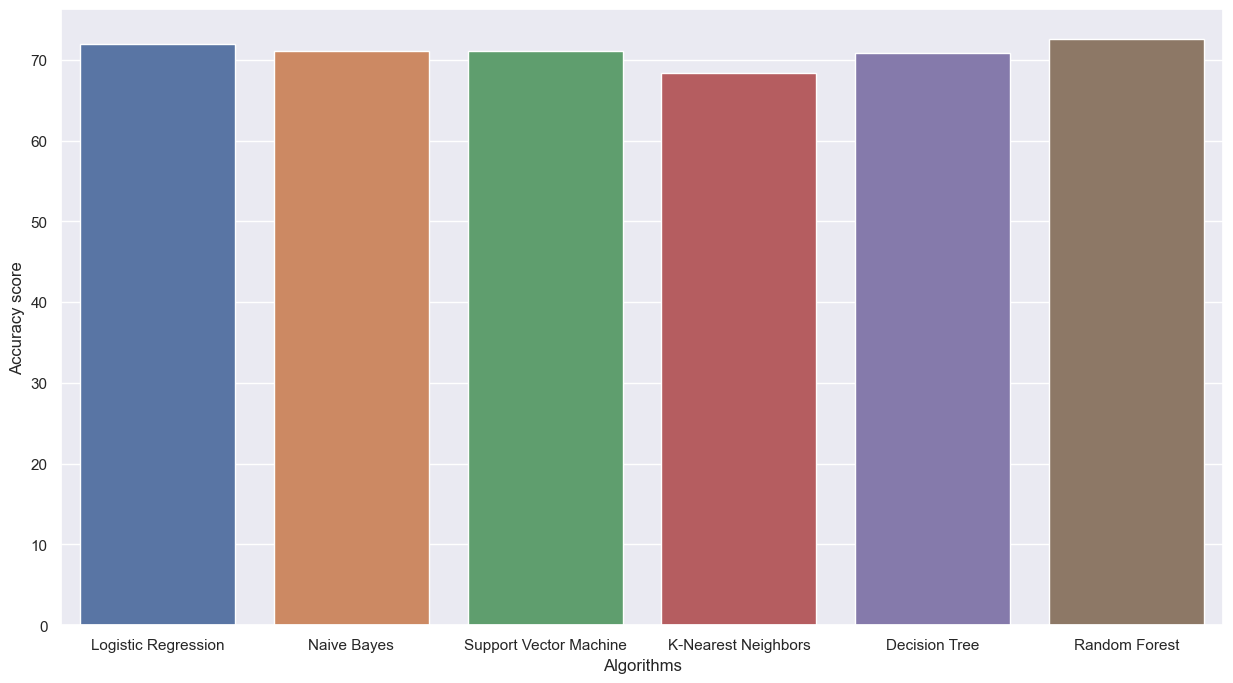

In [106]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)


### Hey there random forest has good result as compare to other algorithms <br> <br>